$$
\begin{aligned}\\
\text{Yixin Zhang}, \href{mailto:yz5811@nyu.edu}{yz5811@nyu.edu}
\end{aligned}
$$

# Problem 1

Draw graphs of AR(1) process $y_k=0.75y_{k-1}+e_k$ for  
a) $y_0=1$  
b) $y_0=10$  
Assume that $e_k$ is uniformly distributed on the interval $[-0.5, 0.5]$.

Hint:  use the function rand() (or similar) for uniform distribution on t $\in$ interval $[0, 1]$ available in modern languages (C/C++, Java) and computational software (Excel, Matlab, etc.) and subtract 0.5 from its values.

Describe qualitative difference between the graphs a) and b)

## Answer

In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
random.seed(1124)

In [2]:
def AR_process(y0, e, N):
    y = np.zeros(N)
    y[0] = y0
    for i in range(1, N):
        y[i] = 0.75*y[i-1]+e[i] 
    return y

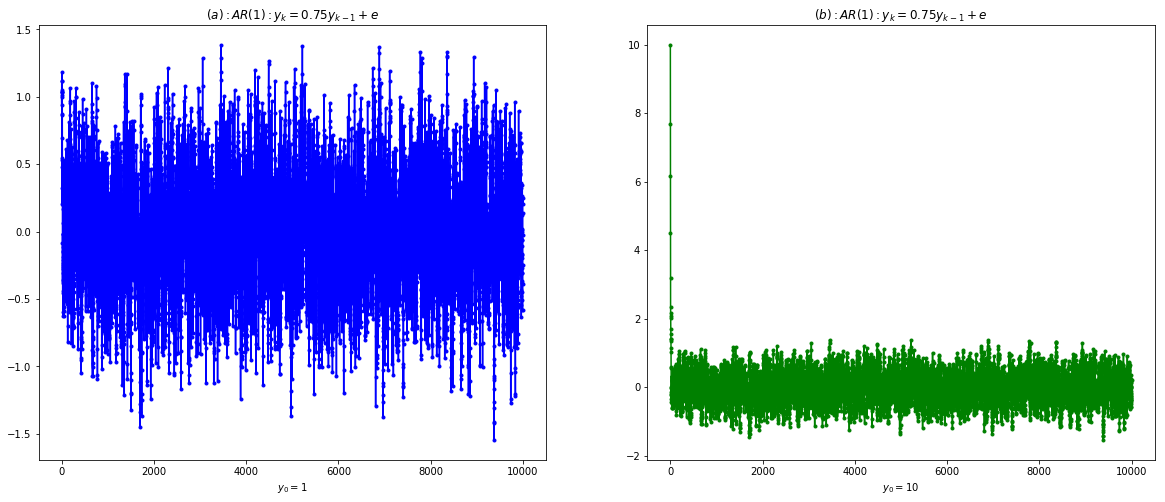

In [3]:
N = 10000
e1 = np.random.uniform(-0.5, 0.5, N)
y1 = AR_process(1, e1, N)
y2 = AR_process(10, e1, N)

plt.figure(figsize=(20,8))
plt.subplot(121, title = '$(a): AR(1): y_k=0.75y_{k-1}+e$')
plt.xlabel('$y_0=1$')
plt.plot(y1, color = 'blue', marker = '.')

plt.subplot(122, title = '$(b): AR(1): y_k=0.75y_{k-1}+e$')
plt.xlabel('$y_0=10$')
plt.plot(y2, color = 'green', marker = '.')
plt.show()

## Describe qualitative difference between the graphs a) and b)

In graph (a), AR(1) starts at $y_0=1$. Values fluctuate around 0. Most values are located in range (-1,1).  
In graph (b), AR(1) starts at $y_0=10$ and keeps decreasing until y approaches approximately 1. Then values fluctuate around 0. Meanwhile, most values are located in range(-1,1) as graph(a).

# Problem 2

Derive the autocorrelation coefficients $\rho(k)$ for AR(2) (provide all details!) and draw their values (up to $k=10$ for  
a) $a_1=0.8, a_2=0.1$  
b) $a_1=1.0, a_2=-0.5$  

Describe qualitative difference between these two cases

## Answer

$$
\begin{aligned} 
AR(2):y_t=a_1y_{t-1}+a_2y_{t-2}+e_t
\end{aligned}
$$

Let $\Phi(z)=1-a_1z-a_2z^2-...-a_pz^p$.  
Denote $G_j$ as the Green function. $G_0=1, G_j=\sum_{j=0}^{2}k_i\lambda_i^j (j=1,2,...).$  
By Green function, the stationary AR(p) process is,

$$
\begin{aligned}   
y_t &= \frac{\epsilon_t}{\Phi(z)}\\ 
    &= \sum_{i=1}^{p}\frac{k_i}{1-\lambda_iz}\epsilon_t\\
    &= \sum_{i=1}^{p}\sum_{j=0}^{\infty}k_i(\lambda_iz)^j\epsilon_t\\
    &=\sum_{j=0}^{\infty}\sum_{i=1}^{p}k_i\lambda_i^j\epsilon_{t-j}\\
    &=\sum_{j=0}^{\infty}G_j\epsilon_{t-j}\\
\end{aligned}
$$

where, $\lambda_i$ is the eigenvalues of the AR(2) process.

Caculate autocovariance,  
By the Green function above, we have  
<center>$Var(y_t)=\sum_{j=0}^{\infty}G_j^2Var(\epsilon_{t-j})$</center>  
Hence,
$$
\begin{aligned}\\
\gamma(0) &= \frac{1-a_2}{(1+a_2)(1-a_1-a_2)(1+a_1-a_2)}\sigma_\epsilon^2 \\
\text{Since cov}[e_t,y_{t-i}]=0,i\ge1,\\
\gamma(1) &= cov[y_t,y_{t-1}] = cov[a_1y_{t-1}+a_2y_{t-2}+e_t,y_{t-1}] \\
            &= a_1cov[y_{t-1},y_{t-1}]+a_2cov[y_{t-2},y_{t-1}]+cov[e_t,y_{t-1}] \\
            &= a_1\gamma(0)+a_2\gamma(1) \\
\to\gamma(1) &= \frac{a_1\gamma(0)}{1-a_2} \\
\to\gamma(2) &= cov[y_t,y_{t-2}] = cov[a_1y_{t-1}+a_2y_{t-2}+e_t,y_{t-2}] \\
            &= a_1cov[y_{t-1},y_{t-2}]+a_2cov[y_{t-2},y_{t-2}]+cov[e_t,y_{t-2}] \\
            &= a_1\gamma(1)+a_2\gamma(0) \\
\end{aligned}
$$

In summary, we can have
$$
\begin{aligned}
\gamma(0) &= \frac{1-a_2}{(1+a_2)(1-a_1-a_2)(1+a_1-a_2)}\sigma_\epsilon^2 \\
\gamma(1) &= \frac{a_1\gamma(0)}{1-a_2} \\
\gamma(2) &= a_1\gamma(1)+a_2\gamma(0) \\
\gamma(k) &= a_1\gamma(k-1)+a_2\gamma(k-2), k\ge2
\end{aligned}
$$

Then calculate autocorrelation function, which is $\rho(k)=\frac{\gamma(k)}{\gamma(0)}$  

Apply $\gamma(0)$,$\gamma(k)$ to the equation, we obtain
$$
\begin{aligned}
\rho(0) &= 1 \\
\rho(1) &= \frac{\gamma(1)}{\gamma(0)} = \frac{a_1}{1-a_2} \\
\rho(k) &= \frac{\gamma(k)}{\gamma(0)} = a_1\rho(k-1)+a_2\rho(k-2), k\ge2 \\
\end{aligned}
$$

In [4]:
df = pd.DataFrame()

def ACF(k, a1, a2):
    ACF = [1]
    ACF.append(a1/(1-a2))
    for i in range(2, k+1):
        ACF.append(a1*ACF[i-1]+a2*ACF[i-2])
    return ACF

df['a'] = ACF(10, 0.8, 0.1)
df['b'] = ACF(10, 1.0, -0.5)
df

,a,b
0,1.000000,1.000000
1,0.888889,0.666667
2,0.811111,0.166667
3,0.737778,-0.166667
4,0.671333,-0.250000
5,0.610844,-0.166667
6,0.555809,-0.041667
7,0.505732,0.041667
8,0.460166,0.062500
9,0.418706,0.041667


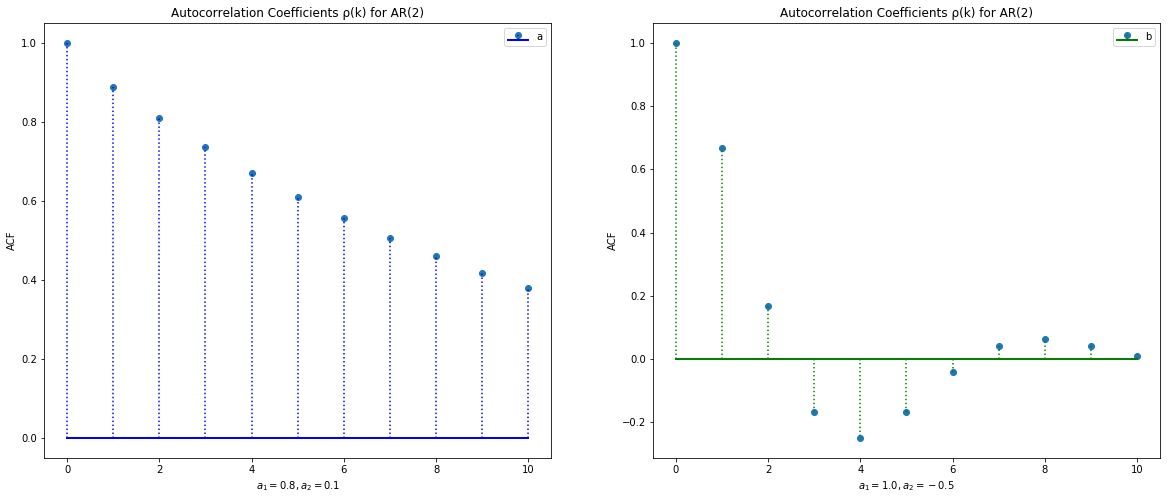

In [5]:
bottom = 0
plt.figure(figsize=(20,8))

plt.subplot(121, title = 'Autocorrelation Coefficients ρ(k) for AR(2)')
plt.xlabel('$a_1=0.8,a_2=0.1$')
plt.ylabel('ACF')
markerline1, stemlines1, baseline1, = plt.stem(df['a'], bottom=bottom, label='a')
plt.setp(stemlines1, color='blue', linestyle=':')  
plt.setp(baseline1, color='blue', linewidth=2, linestyle='-')   
plt.legend(loc='best')


plt.subplot(122, title = 'Autocorrelation Coefficients ρ(k) for AR(2)')
plt.xlabel('$a_1=1.0,a_2=-0.5$')
plt.ylabel('ACF')
markerline2, stemlines2, baseline2, = plt.stem(df['b'], bottom=bottom, label='b')  
plt.setp(stemlines2, color='green', linestyle=':')  
plt.setp(baseline2, color='green', linewidth=2, linestyle='-')   
plt.legend(loc='best')
plt.show()

## Describe qualitative difference between these two cases

- In the left graph above, autocorrelation coefficients are all positive and decrease to 0 slowly. 
- In the right graph above, autocorrelation coefficients oscillate around 0. If increasing k enough, it will converge to 0 finally.

# Problem 3

Verify if the process $y_k=0.6y_{k-1}-0.08y_{k-2}+e_k$ has unit root. If it does, modify the coefficient $a_2$ so that it does not. If the process does not have unit root, modify $a_2$ so that it has unit root. Draw graphs of both processes with $y_0=y_1=1$ and $e_k$ uniformly distributed on the interval $[-0.5, 0.5]$.

## Answer

The characteristic polynomial for the AR(2) is:  
<center>$1-a_1z-a_2z^2=0$</center>  
where $a_1=0.6,a_2=-0.08$.   

The solution for function $0.08z^2-0.6z+1=0$ is:  

<center>$z=\frac{0.6\pm\sqrt{(-0.6)^2-4(0.08)(1)}}{2(0.08)}=\frac{0.6\pm\sqrt{(-0.6)^2-4(0.08)(1)}}{2(0.08)}$</center>  
Hence, 
<center>$z_1=5.0>1, z_2=2.5>1$</center>  
The process $y_k=0.6y_{k-1}-0.08y_{k-2}+e_{k}$ doesn't have unit root. This AR(2) is stationary.

In [6]:
(0.6+math.sqrt(0.6**2-4*(-0.5)))/(-1)

-2.1362291495737216

In [7]:
(0.6-math.sqrt(0.6**2-4*(-0.5)))/(-1)

0.9362291495737217

Modify $a_2$ so that it has unit root.  
<center>$z=\frac{a_1\pm\sqrt{(-a_1)^2-4(-a2)(1)}}{2(-a_2)}=\frac{0.6\pm\sqrt{(-0.6)^2-4(-a2)(1)}}{2(-a_2)}$</center>  
Let $|z|\le1$  

Hence, $a_2\in\left(-0.09,0\right)\cup\left[0.4,0.6\right]$ if $a_2$ is a real number.


- For example, modify $a_2=0.4$ so that it has unit root

In [8]:
z1 = (0.6-math.sqrt(0.6**2-4*(-0.5)))/(-1)
z2 = (0.6+math.sqrt(0.6**2-4*(-0.5)))/(-1)
print(z1, z2)

0.9362291495737217 -2.1362291495737216


In [9]:
def AR2_process(y0, y1, a1, a2, e, N):
    y = np.zeros(N+1)
    y[0] = y0
    y[1] = y1
    for i in range(2, N+1):
        y[i] = a1*y[i-1]+a2*y[i-2]+e[i-2] 
    return y

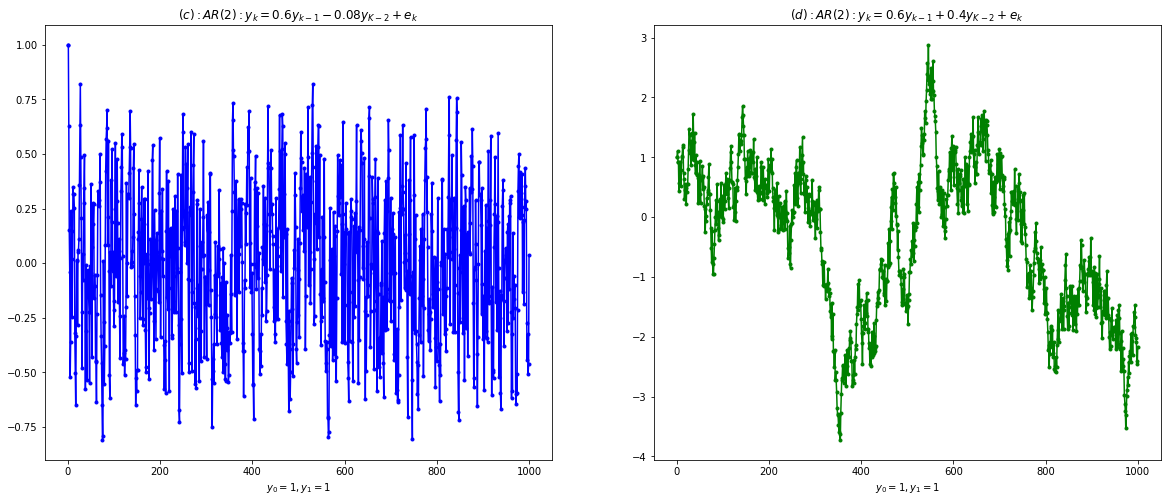

In [10]:
N=1000
e1 = np.random.uniform(-0.5, 0.5, N-1)
y1 = AR2_process(1, 1, 0.6, -0.08, e1, N)
# modify a2=0.4 so that it has unit root
y2 = AR2_process(1, 1, 0.6, 0.4, e1, N)

plt.figure(figsize=(20,8))
plt.subplot(121, title = '$(c):AR(2): y_k=0.6y_{k-1}-0.08y_{K-2}+e_k$')
plt.xlabel('$y_0=1, y_1=1$')
plt.plot(y1, color = 'blue', marker = '.')

plt.subplot(122, title = '$(d):AR(2): y_k=0.6y_{k-1}+0.4y_{K-2}+e_k$')
plt.xlabel('$y_0=1, y_1=1$')
plt.plot(y2, color = 'green', marker = '.')
plt.show()

# Problem 4

Impelment an algorithm for simulating the normal distribution. Repeat the exercise (1) with $e_k\sim N(0,0.5)$. Describe the difference between results with uniform and normal distributions.  
Hint: use the Box-Miller transfrom:  
(e.g.https://en.wikipedia.org/wiki/Box–Muller_transform)  
or the generic inverse transform:  
https://en.wikipedia.org/wiki/Inverse_transform_sampling

## Answer

Box–Muller transform  
Suppose $U_1$ and $U_2$ are independent samples chosen from the uniform distribution on the unit interval $(0,1)$. Let  
$Z_0=R\cos(\Theta)=\sqrt{-2lnU_1}\cos(2\pi U_2)$  
$Z_1=R\sin(\Theta)=\sqrt{-2lnU_1}\sin(2\pi U_2)$  
where $R^2=-2\cdot lnU_1$ and $\Theta=2\pi U_2$
Then $Z_0$ and $Z_1$ are independent random variables with a standard normal distribution.

In [11]:
# We also can use random.normal to get z1, z2
# transformation function
def generateGaussian(u1, u2):
  z1 = np.sqrt(-2*np.log(u1))*np.cos(2*math.pi*u2)
  z2 = np.sqrt(-2*np.log(u1))*np.sin(2*math.pi*u2)
  return z1,z2

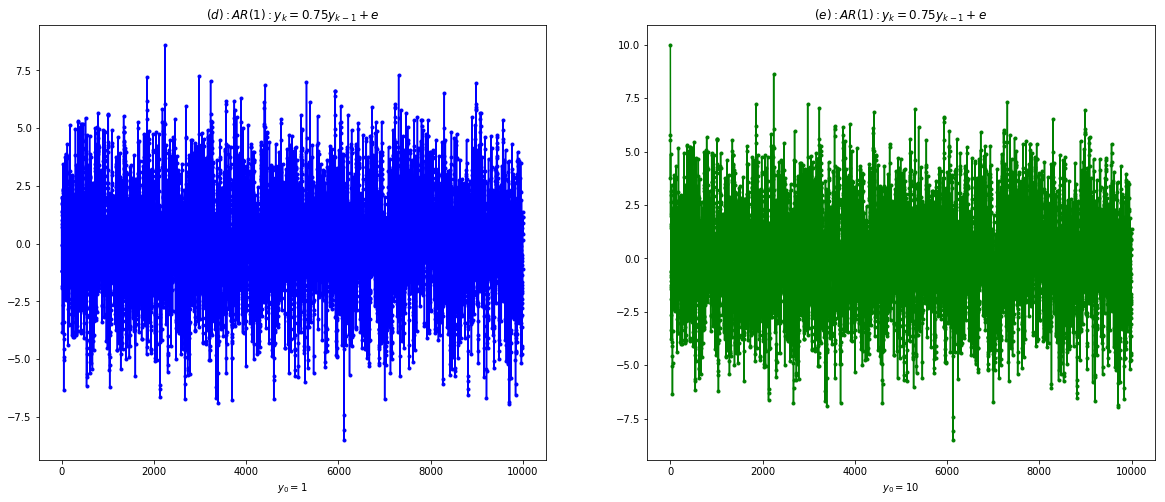

In [12]:
N = 10000
#     uniformly distributed values between 0 and 1
u1 = np.random.uniform(0, 1, N)
u2 = np.random.uniform(0, 1, N)
z1, z2 = generateGaussian(u1, u2)
y1 = AR_process(1, z1/math.sqrt(0.5), N)
y2 = AR_process(10, z1/math.sqrt(0.5), N)


plt.figure(figsize=(20,8))
plt.subplot(121, title = '$(d):AR(1): y_k=0.75y_{k-1}+e$')
plt.xlabel('$y_0=1$')
plt.plot(y1, color = 'blue', marker = '.')

plt.subplot(122, title = '$(e):AR(1): y_k=0.75y_{k-1}+e$')
plt.xlabel('$y_0=10$')
plt.plot(y2, color = 'green', marker = '.')
plt.show()

## Describe the difference between results with uniform and normal distributions.

  In graph(a) and (d), AR(1) starts at $y_0=1$.  
  
  For the graph(a) with uniform distribution, values fluctuate around 0 and most values are located in range (-1,1).  
  
  While for the graph(d) with normal distribution, values fluctuate around 0 and most values are located in range (-3,3).  
  
  In graph(b) and (e), AR(1) starts at $y_0=10$.  
  
  For the graph(b) with uniform distribution, values fluctuate around 0 and most values are located in range (-1,1).  
  
  While for the graph(e) with normal distribution, values fluctuate around 0 and most values are located in range (-3,3).  
  
  In summary, 
  - the fluctuation range using normal distribution is larger than that of uniform distribution. 
  - No matter what the start value is, the AR process approaches to around 0 eventually.